# return_sequences=False  Airline

In [1]:
# Compatibility layer between Python 2 and Python 3
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils

# %%
#Normalization  
def feature_normalize(train):
    train_norm = train.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))  #標準化(介於0~1之間)
    return train_norm


## 很重要  切割視窗
def create_segments_and_labels(df, time_steps, step):

    N_FEATURES = 1
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps-1, step):
        xs = df.values[i: i + time_steps]
        rate = (df.values[i + time_steps]-df.values[i + time_steps-1])/df.values[i + time_steps-1]
        #rate = df.values[i + time_steps]-df.values[i + time_steps-1]
        temp = rate
        if temp < 0:
            if temp <= -0.2:
                label =0
            elif temp <= -0.1:
                label =1
            elif temp < 0:
                label =2
        else:
            if temp == 0:
                label =3
            elif temp <= 0.1:
                label =4
            elif temp <= 0.2:
                label =5                
            elif temp >0.2:
                label =6              
 
        segments.append([xs])
        labels.append([label])

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

# ------- THE PROGRAM TO LOAD DATA AND TRAIN THE MODEL -------

# The number of steps within one time segment
TIME_PERIODS = 12
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 1

# %%

print("\n--- Load, inspect and transform data ---\n")

# Load data set containing all the data from csv
df = pd.read_csv('D:/Value of Dream/108-1 深度學習/Deep Learning Tool/Data/airline.csv',encoding='Big5')    #編碼為Big5
cols=['passenger']       #命名欄位
df =df[cols]                                      #將欄位名稱放入資料中          


# %%

print("\n--- Reshape the data into segments ---\n")

# Normalize features for training data set
df_train= feature_normalize(df)

x_train, y_train = create_segments_and_labels(df_train, TIME_PERIODS, STEP_DISTANCE)

# %%

print("\n--- Reshape data to be accepted by Keras ---\n")

# Inspect x data
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'training samples')

print('y_train shape: ', y_train.shape)

# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = 7


# Set input_shape / reshape for Keras
input_shape = (num_time_periods*num_sensors)   
x_train = x_train.reshape(x_train.shape[0], input_shape)   

print('x_train shape:', x_train.shape)
print('input_shape:', input_shape)

# Convert type for Keras otherwise Keras cannot process the data
x_train = x_train.astype("float32")
y_train = y_train.astype("float32")

# %%

# One-hot encoding of y_train labels (only execute once!)
y_train_oneshot = np_utils.to_categorical(y_train, num_classes)


## 分成訓練跟測試
x_train_used = x_train[0:120,]
y_train_used_oneshot = y_train_oneshot[0:120,]
x_test_used = x_train[121:,]
y_test_used_oneshot = y_train_oneshot[121:,]

print("\n--- Create neural network model ---\n")


## 注意注意注意!!
## LSTM  的輸入格式 一筆資料格式是 (12,1)
## 整個格式要改成 (120, 12,1)  最前面120是資料筆數!!
## 所以  下面程式要加一個維度  擺放資料!!


# from 2 dimmension to 3 dimension


x_train_used = x_train_used[:,:,np.newaxis]
x_test_used = x_test_used[:,:,np.newaxis]


Using TensorFlow backend.



--- Load, inspect and transform data ---


--- Reshape the data into segments ---


--- Reshape data to be accepted by Keras ---

x_train shape:  (131, 12, 1)
131 training samples
y_train shape:  (131, 1)
x_train shape: (131, 12)
input_shape: 12

--- Create neural network model ---



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\USER\Anaconda3.71016\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  del sys.path[0]
C:\Users\USER\Anaconda3.71016\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, return_sequences=False, input_shape=(12, 1))`
  del sys.path[0]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 119       
Total para

Epoch 79/550
 - 0s - loss: 1.7218 - acc: 0.2315 - val_loss: 1.7598 - val_acc: 0.1667
Epoch 80/550
 - 0s - loss: 1.7569 - acc: 0.1852 - val_loss: 1.7514 - val_acc: 0.1667
Epoch 81/550
 - 0s - loss: 1.6896 - acc: 0.2685 - val_loss: 1.7489 - val_acc: 0.1667
Epoch 82/550
 - 0s - loss: 1.7413 - acc: 0.1944 - val_loss: 1.7723 - val_acc: 0.1667
Epoch 83/550
 - 0s - loss: 1.6897 - acc: 0.2315 - val_loss: 1.7632 - val_acc: 0.1667
Epoch 84/550
 - 0s - loss: 1.6800 - acc: 0.2222 - val_loss: 1.7466 - val_acc: 0.1667
Epoch 85/550
 - 0s - loss: 1.6794 - acc: 0.2685 - val_loss: 1.7556 - val_acc: 0.0833
Epoch 86/550
 - 0s - loss: 1.7234 - acc: 0.2037 - val_loss: 1.7292 - val_acc: 0.3333
Epoch 87/550
 - 0s - loss: 1.6965 - acc: 0.2315 - val_loss: 1.7590 - val_acc: 0.1667
Epoch 88/550
 - 0s - loss: 1.7103 - acc: 0.2037 - val_loss: 1.7535 - val_acc: 0.1667
Epoch 89/550
 - 0s - loss: 1.6695 - acc: 0.3241 - val_loss: 1.7243 - val_acc: 0.2500
Epoch 90/550
 - 0s - loss: 1.6905 - acc: 0.2593 - val_loss: 1.725

Epoch 175/550
 - 0s - loss: 1.3779 - acc: 0.4815 - val_loss: 1.3358 - val_acc: 0.5833
Epoch 176/550
 - 0s - loss: 1.3049 - acc: 0.4815 - val_loss: 1.1891 - val_acc: 0.5833
Epoch 177/550
 - 0s - loss: 1.3466 - acc: 0.4074 - val_loss: 1.0944 - val_acc: 0.6667
Epoch 178/550
 - 0s - loss: 1.2924 - acc: 0.4352 - val_loss: 1.0867 - val_acc: 0.6667
Epoch 179/550
 - 0s - loss: 1.2373 - acc: 0.4907 - val_loss: 1.1692 - val_acc: 0.6667
Epoch 180/550
 - 0s - loss: 1.1869 - acc: 0.5185 - val_loss: 1.1011 - val_acc: 0.5000
Epoch 181/550
 - 0s - loss: 1.1289 - acc: 0.5278 - val_loss: 1.1351 - val_acc: 0.7500
Epoch 182/550
 - 0s - loss: 1.1360 - acc: 0.5093 - val_loss: 1.2023 - val_acc: 0.6667
Epoch 183/550
 - 0s - loss: 1.1398 - acc: 0.4537 - val_loss: 1.5614 - val_acc: 0.5000
Epoch 184/550
 - 0s - loss: 1.2824 - acc: 0.4815 - val_loss: 1.1794 - val_acc: 0.6667
Epoch 185/550
 - 0s - loss: 1.0537 - acc: 0.5648 - val_loss: 1.1767 - val_acc: 0.6667
Epoch 186/550
 - 0s - loss: 1.0688 - acc: 0.5278 - val

Epoch 271/550
 - 0s - loss: 0.8764 - acc: 0.6574 - val_loss: 1.0078 - val_acc: 0.6667
Epoch 272/550
 - 0s - loss: 0.8185 - acc: 0.6296 - val_loss: 1.0879 - val_acc: 0.6667
Epoch 273/550
 - 0s - loss: 0.7052 - acc: 0.7315 - val_loss: 1.0688 - val_acc: 0.6667
Epoch 274/550
 - 0s - loss: 0.8489 - acc: 0.6389 - val_loss: 1.0924 - val_acc: 0.6667
Epoch 275/550
 - 0s - loss: 0.7256 - acc: 0.7315 - val_loss: 1.1307 - val_acc: 0.6667
Epoch 276/550
 - 0s - loss: 0.7558 - acc: 0.6759 - val_loss: 1.1708 - val_acc: 0.6667
Epoch 277/550
 - 0s - loss: 0.8301 - acc: 0.6019 - val_loss: 1.1051 - val_acc: 0.6667
Epoch 278/550
 - 0s - loss: 0.8595 - acc: 0.6111 - val_loss: 1.2168 - val_acc: 0.6667
Epoch 279/550
 - 0s - loss: 0.7857 - acc: 0.6852 - val_loss: 0.9934 - val_acc: 0.6667
Epoch 280/550
 - 0s - loss: 0.7778 - acc: 0.6759 - val_loss: 1.2687 - val_acc: 0.6667
Epoch 281/550
 - 0s - loss: 0.7834 - acc: 0.6481 - val_loss: 1.1731 - val_acc: 0.6667
Epoch 282/550
 - 0s - loss: 0.7885 - acc: 0.6667 - val

Epoch 367/550
 - 0s - loss: 0.6120 - acc: 0.7222 - val_loss: 1.1469 - val_acc: 0.7500
Epoch 368/550
 - 0s - loss: 0.5691 - acc: 0.7963 - val_loss: 1.1415 - val_acc: 0.7500
Epoch 369/550
 - 0s - loss: 0.6875 - acc: 0.7130 - val_loss: 1.0991 - val_acc: 0.7500
Epoch 370/550
 - 0s - loss: 0.6323 - acc: 0.7500 - val_loss: 1.1780 - val_acc: 0.6667
Epoch 371/550
 - 0s - loss: 0.6045 - acc: 0.7500 - val_loss: 1.4244 - val_acc: 0.6667
Epoch 372/550
 - 0s - loss: 0.7058 - acc: 0.7407 - val_loss: 1.4072 - val_acc: 0.6667
Epoch 373/550
 - 0s - loss: 0.8384 - acc: 0.7500 - val_loss: 1.0170 - val_acc: 0.8333
Epoch 374/550
 - 0s - loss: 0.6753 - acc: 0.7130 - val_loss: 1.2023 - val_acc: 0.5833
Epoch 375/550
 - 0s - loss: 0.7138 - acc: 0.6944 - val_loss: 0.9897 - val_acc: 0.7500
Epoch 376/550
 - 0s - loss: 0.5873 - acc: 0.7685 - val_loss: 0.9848 - val_acc: 0.7500
Epoch 377/550
 - 0s - loss: 0.5012 - acc: 0.8148 - val_loss: 0.9418 - val_acc: 0.7500
Epoch 378/550
 - 0s - loss: 0.4410 - acc: 0.8519 - val

Epoch 463/550
 - 0s - loss: 0.3410 - acc: 0.8704 - val_loss: 1.3623 - val_acc: 0.7500
Epoch 464/550
 - 0s - loss: 0.3691 - acc: 0.8519 - val_loss: 1.2752 - val_acc: 0.7500
Epoch 465/550
 - 0s - loss: 0.3772 - acc: 0.8426 - val_loss: 1.3351 - val_acc: 0.7500
Epoch 466/550
 - 0s - loss: 0.3041 - acc: 0.8981 - val_loss: 1.2766 - val_acc: 0.7500
Epoch 467/550
 - 0s - loss: 0.3920 - acc: 0.8426 - val_loss: 1.4601 - val_acc: 0.7500
Epoch 468/550
 - 0s - loss: 0.3687 - acc: 0.8611 - val_loss: 1.4275 - val_acc: 0.7500
Epoch 469/550
 - 0s - loss: 0.3613 - acc: 0.8611 - val_loss: 1.3905 - val_acc: 0.7500
Epoch 470/550
 - 0s - loss: 0.2601 - acc: 0.9352 - val_loss: 1.3866 - val_acc: 0.7500
Epoch 471/550
 - 0s - loss: 0.3234 - acc: 0.8889 - val_loss: 1.4620 - val_acc: 0.7500
Epoch 472/550
 - 0s - loss: 0.3518 - acc: 0.8704 - val_loss: 1.4596 - val_acc: 0.7500
Epoch 473/550
 - 0s - loss: 0.3832 - acc: 0.8426 - val_loss: 1.4866 - val_acc: 0.7500
Epoch 474/550
 - 0s - loss: 0.3525 - acc: 0.8426 - val

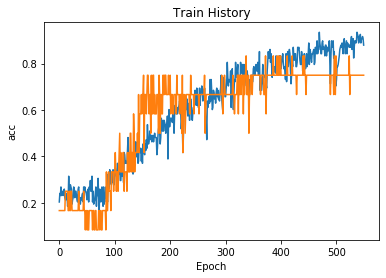

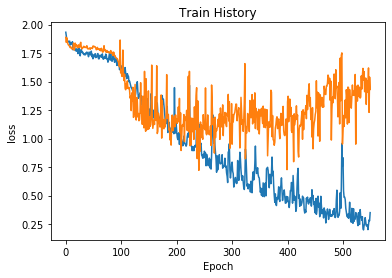

10/10 [==============================] - 0s 96us/step
Accuracy: 0.5%


array([[0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 2],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0]], dtype=int64)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers import SimpleRNN, Activation, Dense, RNN
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline

## build one To One Model(shape):
model = Sequential()
## LSTM  注意他的 input 格式!!
model.add(LSTM(128, input_length=x_train_used.shape[1], input_dim=x_train_used.shape[2],return_sequences=False))
#128個Gate
## input_length=12, input_dim=1
#第二個開始就沒有LSTM
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))#非LSTM
model.add(Dropout(0.1))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
model.summary()

print("\n--- Fit the model ---\n")

train_history = model.fit(x=x_train_used, y= y_train_used_oneshot, validation_split=0.1, epochs=550, batch_size=10, verbose=2)


print("\n--- Learning curve of model training ---\n")

get_ipython().magic('matplotlib inline')
## IPython有一組預先定義好的所謂的魔法函數（Magic Functions），你可以通過命令列的語法形式來訪問它們。

import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

show_train_history(train_history, "acc", "val_acc") ## 訓練正確率圖

show_train_history(train_history, "loss", "val_loss") ## 訓練誤差圖

###############################


scores = model.evaluate(x_test_used, y_test_used_oneshot)

print("Accuracy: {}%".format(scores[1]))


results = model.predict_classes(x_test_used)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train[121:,], results)
cm


# return_sequences=True  Airline

C:\Users\USER\Anaconda3.71016\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\Users\USER\Anaconda3.71016\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, return_sequences=True, input_shape=(12, 1))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 12, 128)           66560     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
__________

Epoch 81/550
 - 0s - loss: 1.7355 - acc: 0.1667 - val_loss: 1.7227 - val_acc: 0.2500
Epoch 82/550
 - 0s - loss: 1.6723 - acc: 0.2870 - val_loss: 1.6888 - val_acc: 0.3333
Epoch 83/550
 - 0s - loss: 1.6582 - acc: 0.2870 - val_loss: 1.7017 - val_acc: 0.2500
Epoch 84/550
 - 0s - loss: 1.6954 - acc: 0.2963 - val_loss: 1.6417 - val_acc: 0.3333
Epoch 85/550
 - 0s - loss: 1.6181 - acc: 0.2870 - val_loss: 1.6189 - val_acc: 0.4167
Epoch 86/550
 - 0s - loss: 1.6559 - acc: 0.3241 - val_loss: 1.7193 - val_acc: 0.2500
Epoch 87/550
 - 0s - loss: 1.6803 - acc: 0.2778 - val_loss: 1.7132 - val_acc: 0.3333
Epoch 88/550
 - 0s - loss: 1.7294 - acc: 0.2407 - val_loss: 1.6552 - val_acc: 0.3333
Epoch 89/550
 - 0s - loss: 1.6902 - acc: 0.2870 - val_loss: 1.8568 - val_acc: 0.1667
Epoch 90/550
 - 0s - loss: 1.6462 - acc: 0.2593 - val_loss: 1.6089 - val_acc: 0.3333
Epoch 91/550
 - 0s - loss: 1.6597 - acc: 0.3241 - val_loss: 1.6080 - val_acc: 0.3333
Epoch 92/550
 - 0s - loss: 1.6008 - acc: 0.3704 - val_loss: 1.596

Epoch 177/550
 - 0s - loss: 1.0458 - acc: 0.5741 - val_loss: 1.2109 - val_acc: 0.5833
Epoch 178/550
 - 0s - loss: 0.9900 - acc: 0.6296 - val_loss: 1.2201 - val_acc: 0.5833
Epoch 179/550
 - 0s - loss: 1.0388 - acc: 0.5926 - val_loss: 1.1890 - val_acc: 0.6667
Epoch 180/550
 - 0s - loss: 1.0727 - acc: 0.5556 - val_loss: 1.3767 - val_acc: 0.6667
Epoch 181/550
 - 0s - loss: 1.1277 - acc: 0.5556 - val_loss: 1.0883 - val_acc: 0.6667
Epoch 182/550
 - 0s - loss: 1.0976 - acc: 0.5556 - val_loss: 1.0434 - val_acc: 0.5833
Epoch 183/550
 - 0s - loss: 1.0745 - acc: 0.5463 - val_loss: 1.3019 - val_acc: 0.7500
Epoch 184/550
 - 0s - loss: 1.0293 - acc: 0.5463 - val_loss: 1.3923 - val_acc: 0.5833
Epoch 185/550
 - 0s - loss: 1.0295 - acc: 0.5741 - val_loss: 1.4311 - val_acc: 0.6667
Epoch 186/550
 - 0s - loss: 1.2268 - acc: 0.4444 - val_loss: 2.5060 - val_acc: 0.4167
Epoch 187/550
 - 0s - loss: 1.2745 - acc: 0.4815 - val_loss: 0.7418 - val_acc: 0.6667
Epoch 188/550
 - 0s - loss: 1.3749 - acc: 0.4630 - val

Epoch 273/550
 - 0s - loss: 0.6403 - acc: 0.7593 - val_loss: 1.7100 - val_acc: 0.7500
Epoch 274/550
 - 0s - loss: 0.6907 - acc: 0.7130 - val_loss: 1.8101 - val_acc: 0.7500
Epoch 275/550
 - 0s - loss: 0.6002 - acc: 0.7593 - val_loss: 1.7855 - val_acc: 0.7500
Epoch 276/550
 - 0s - loss: 0.6509 - acc: 0.6759 - val_loss: 1.6964 - val_acc: 0.7500
Epoch 277/550
 - 0s - loss: 0.5860 - acc: 0.7870 - val_loss: 1.7719 - val_acc: 0.7500
Epoch 278/550
 - 0s - loss: 0.6701 - acc: 0.6667 - val_loss: 1.7838 - val_acc: 0.7500
Epoch 279/550
 - 0s - loss: 0.6163 - acc: 0.7500 - val_loss: 1.8204 - val_acc: 0.7500
Epoch 280/550
 - 0s - loss: 0.5932 - acc: 0.7870 - val_loss: 1.9093 - val_acc: 0.7500
Epoch 281/550
 - 0s - loss: 0.6217 - acc: 0.7315 - val_loss: 1.8803 - val_acc: 0.7500
Epoch 282/550
 - 0s - loss: 0.5996 - acc: 0.7685 - val_loss: 1.9534 - val_acc: 0.7500
Epoch 283/550
 - 0s - loss: 0.6136 - acc: 0.7407 - val_loss: 2.0555 - val_acc: 0.6667
Epoch 284/550
 - 0s - loss: 0.6615 - acc: 0.7130 - val

Epoch 369/550
 - 0s - loss: 0.5534 - acc: 0.7685 - val_loss: 2.3189 - val_acc: 0.7500
Epoch 370/550
 - 0s - loss: 0.5287 - acc: 0.7963 - val_loss: 2.4306 - val_acc: 0.7500
Epoch 371/550
 - 0s - loss: 0.6021 - acc: 0.7593 - val_loss: 2.5689 - val_acc: 0.7500
Epoch 372/550
 - 0s - loss: 0.4766 - acc: 0.8519 - val_loss: 2.5468 - val_acc: 0.7500
Epoch 373/550
 - 0s - loss: 0.4525 - acc: 0.8241 - val_loss: 2.5265 - val_acc: 0.6667
Epoch 374/550
 - 0s - loss: 0.4955 - acc: 0.8148 - val_loss: 1.9489 - val_acc: 0.7500
Epoch 375/550
 - 0s - loss: 0.4064 - acc: 0.8704 - val_loss: 2.1741 - val_acc: 0.7500
Epoch 376/550
 - 0s - loss: 0.4220 - acc: 0.8426 - val_loss: 3.4054 - val_acc: 0.7500
Epoch 377/550
 - 0s - loss: 0.6142 - acc: 0.7685 - val_loss: 2.0943 - val_acc: 0.7500
Epoch 378/550
 - 0s - loss: 0.5785 - acc: 0.7593 - val_loss: 2.6651 - val_acc: 0.6667
Epoch 379/550
 - 0s - loss: 0.4807 - acc: 0.8148 - val_loss: 2.7337 - val_acc: 0.6667
Epoch 380/550
 - 0s - loss: 0.5180 - acc: 0.8611 - val

Epoch 465/550
 - 0s - loss: 0.2752 - acc: 0.9074 - val_loss: 2.2188 - val_acc: 0.7500
Epoch 466/550
 - 0s - loss: 0.2425 - acc: 0.9444 - val_loss: 2.2512 - val_acc: 0.7500
Epoch 467/550
 - 0s - loss: 0.2485 - acc: 0.8889 - val_loss: 2.2471 - val_acc: 0.7500
Epoch 468/550
 - 0s - loss: 0.2573 - acc: 0.9074 - val_loss: 2.2318 - val_acc: 0.7500
Epoch 469/550
 - 0s - loss: 0.2344 - acc: 0.9167 - val_loss: 2.3539 - val_acc: 0.7500
Epoch 470/550
 - 0s - loss: 0.2139 - acc: 0.9444 - val_loss: 2.4480 - val_acc: 0.7500
Epoch 471/550
 - 0s - loss: 0.2292 - acc: 0.9167 - val_loss: 2.4743 - val_acc: 0.7500
Epoch 472/550
 - 0s - loss: 0.2645 - acc: 0.9074 - val_loss: 2.4045 - val_acc: 0.7500
Epoch 473/550
 - 0s - loss: 0.2086 - acc: 0.9074 - val_loss: 2.4379 - val_acc: 0.7500
Epoch 474/550
 - 0s - loss: 0.2307 - acc: 0.9444 - val_loss: 2.6036 - val_acc: 0.7500
Epoch 475/550
 - 0s - loss: 0.2154 - acc: 0.9259 - val_loss: 2.6604 - val_acc: 0.7500
Epoch 476/550
 - 0s - loss: 0.2453 - acc: 0.9167 - val

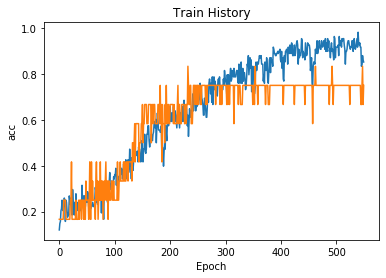

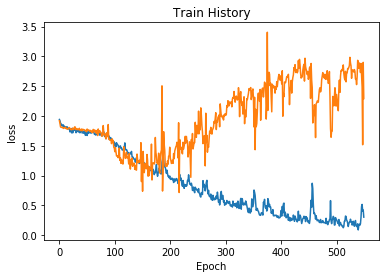

10/10 [==============================] - 0s 296us/step
Accuracy: 0.6000000238418579%


array([[0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]], dtype=int64)

In [7]:
#一對一模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers import SimpleRNN, Activation, Dense, RNN
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline

## build one To One Model(shape):
model = Sequential()
##  SimpleRNN  注意他的 input 格式!!
model.add(LSTM(128, input_length=x_train_used.shape[1], input_dim=x_train_used.shape[2],return_sequences=True))
## return_sequences=True，變成以三維輸出
## input_length=12, input_dim=1
model.add(LSTM(32))  #這邊多加一層 return_sequences=False 才可以配合連接到下面的Dense(64)
##要加這一行，把資料轉為二維
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
model.summary()

print("\n--- Fit the model ---\n")

train_history = model.fit(x=x_train_used, y= y_train_used_oneshot, validation_split=0.1, epochs=550, batch_size=10, verbose=2)


print("\n--- Learning curve of model training ---\n")

get_ipython().magic('matplotlib inline')
## IPython有一組預先定義好的所謂的魔法函數（Magic Functions），你可以通過命令列的語法形式來訪問它們。

import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

show_train_history(train_history, "acc", "val_acc") ## 訓練正確率圖

show_train_history(train_history, "loss", "val_loss") ## 訓練誤差圖

###############################


scores = model.evaluate(x_test_used, y_test_used_oneshot)

print("Accuracy: {}%".format(scores[1]))


results = model.predict_classes(x_test_used)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train[121:,], results)
cm

